# **Lab Question Part 2 CSE475**

All the datasets are uploaded to Google Drive and linked with this colab file, you can directly access those datasets, or you can download, However you have to take necessary steps to load datasets.

For example, if you upload your dataset in your drive, you have to connect with your drive for do this run the drive.mount()

For this part, you should spend 45 minutes only. No more than extra time will be given.

In [181]:
# from google.colab import drive
# drive.mount('/content/drive')

# Part 2

Work with the [Indian Liver Patient Dataset](https://drive.google.com/file/d/1co_4_CRhzMR3UTsed7mcSWftDjjN2AOl/view?usp=sharing)

Instantiate a Logistic Regression classifier and assign it to lr.

Instantiate a KNN classifier that considers 27 nearest neighbors and assign it to knn.

Instantiate a Decision Tree Classifier with the parameter min_samples_leaf set to 0.13 and assign it to dt.

Define the list classifiers Logistic Regression, K Nearest Neighbours, Classification Tree.

Split the dataset to 80% train and 20% test.

Iterate over the pre-defined list of classifiers

Fit the model

Predict y_pred each classifiers   
    
Calculate accuracy of each classifiers
     
Evaluate the accuracy on the test set


In [182]:
# Importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ConvergenceWarning
import warnings

In [183]:
# Loading the dataset
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")

In [184]:
# Data Preprocessing
df["gender"] = df["gender"].map({"Male": 1, "Female": 0})

In [185]:
# Extract features and target variable
X = df.drop("is_patient", axis=1)
y = df["is_patient"]

In [186]:
# Handle missing values by imputing with mean
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [187]:
# Scale the features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [188]:
# Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [189]:
# Instantiate a Logistic Regression Classifier
lr = LogisticRegression(max_iter=1000)

In [190]:
# Instantiate a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=27)

In [191]:
# Instantiate Decision Tree Classifier
dt = DecisionTreeClassifier(min_samples_leaf=0.13)

In [192]:
# Define the list classifiers Logistic Regression, K Nearest Neighbours, Classification Tree.
classifiers = [lr, knn, dt]
classifier_names = [
    "Logistic Regression",
    "K Nearest Neighbours",
    "Classification Tree",
]

In [193]:
# Split the dataset to 80% train and 20% test.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [194]:
# Iterate over classifiers
for clf, clf_name in zip(classifiers, classifier_names):
    # Fit the model
    clf.fit(X_train, y_train)

    # Predict y_pred
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print results
    print(f"{clf_name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.7607
K Nearest Neighbours Accuracy: 0.7521
Classification Tree Accuracy: 0.7265


Work with the [taiwan_real_estate](https://drive.google.com/file/d/1Rik6ZLorVTPnHb5ETlJ_lS5grhjz2SNe/view?usp=sharing) dataset.

Import the ols() function from the statsmodels.formula.api package.

Run a linear regression with price_twd_msq as the response variable, n_convenience as the explanatory variable, and taiwan_real_estate as the dataset. Name it mdl_price_vs_conv.

Fit the model.

Print the parameters of the fitted model.




In [195]:
# Importing the libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [196]:
# Load the dataset
taiwan = pd.read_csv("taiwan_real_estate2.csv")

In [197]:
# Run a linear regression
formula = "price_twd_msq ~ n_convenience"
mdl_price_vs_conv = ols(formula, data=taiwan).fit()

In [198]:
# Print the parameters of the fitted model
print(mdl_price_vs_conv.summary().tables[1])

                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857      0.000       7.664       8.784
n_convenience     0.7981      0.057     14.118      0.000       0.687       0.909


Work with the [Customer churn](https://drive.google.com/file/d/1Ernmk97Gclk8FHgNn3XtD6Nt4FdaNhfB/view?usp=sharing) Dataset, Each row represents a customer over a year and whether the customer churned, and the target variable , 1 = yes or 0 = no.


Check if there are any null values in the dataset, if yes fix it

Create a logistic regression classifier from skitlearn

Train the classifer on the train set

Predict the outcomes on the test set

Find out the confusion matrix

Plot a labeled confusion matrix with Seaborn

Show the Accuricy of the model



In [199]:
# Importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [200]:
# Load the dataset
customer_data = pd.read_csv("customer_churn.csv")

In [201]:
# Check for NULL
print("Null values in the dataset:")
print(customer_data.isnull().sum())

# Fix null values if any
customer_data.fillna(0, inplace=True)

Null values in the dataset:
Call Failure               0
Complaints                 0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


In [202]:
# Define features (X) and target variable (y)
X = customer_data.drop("Churn", axis=1)
y = customer_data["Churn"]

In [203]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [204]:
# Create a logistic regression classifier
classifier = LogisticRegression()

In [205]:
# Train the classifier on the training set
classifier.fit(X_train, y_train)

LogisticRegression()

In [206]:
# Predict the outcomes on the test set
y_pred = classifier.predict(X_test)

In [207]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[223  10]
 [ 43  10]]


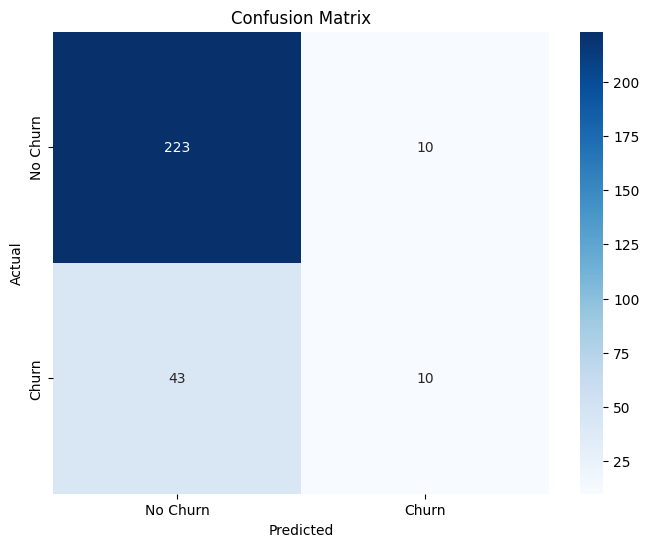

In [208]:
# Plot a labeled confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [209]:
# Calculate and display the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

Accuracy of the model: 81.47%


Work with the [Bike Sharing Demand dataset](https://www.kaggle.com/c/bike-sharing-demand) available through Kaggle download dataset from [here](https://drive.google.com/file/d/1gkMDvMqVS5Xw0LAYllmnQFW2jb8mQXv8/view?usp=sharing).

Import RandomForestRegressor from sklearn.ensemble.

Instantiate a RandomForestRegressor called rf consisting of 25 trees.

Fit rf to the training set

In [210]:
# Importing the libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [211]:
# Load the training and test datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [212]:
# Extract features and target variable from the training set
X_train = train_data.drop(["count", "casual", "registered"], axis=1)
y_train = train_data["count"]

In [213]:
# Extract features from the datetime column in training set
X_train["datetime"] = pd.to_datetime(X_train["datetime"])
X_train["hour"] = X_train["datetime"].dt.hour
X_train["day"] = X_train["datetime"].dt.day
X_train["month"] = X_train["datetime"].dt.month
X_train["year"] = X_train["datetime"].dt.year
X_train.drop(["datetime"], axis=1, inplace=True)

# Extract features from the datetime column in test set
test_data["datetime"] = pd.to_datetime(test_data["datetime"])
test_data["hour"] = test_data["datetime"].dt.hour
test_data["day"] = test_data["datetime"].dt.day
test_data["month"] = test_data["datetime"].dt.month
test_data["year"] = test_data["datetime"].dt.year
test_data.drop(["datetime"], axis=1, inplace=True)

In [214]:
# Instantiate RandomForestRegressor with 25 trees
rf = RandomForestRegressor(n_estimators=25, random_state=42)

In [215]:
# Fit the model to the training set
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=42)

In [216]:
test_predictions = rf.predict(test_data)